In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv=datasets.fetch_olivetti_faces();

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\dell\scikit_learn_data


In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

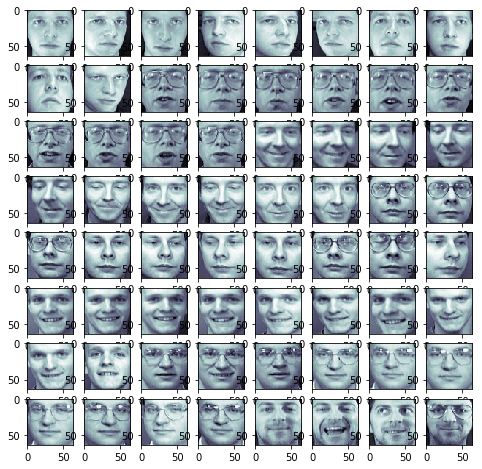

In [7]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [24]:
x=oliv.data
y=oliv.target

In [12]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_.shape

(400, 4096)

In [16]:
k=0
current_sum=0
total=sum(pca.explained_variance_)
while current_sum/total<0.95:
    current_sum+=pca.explained_variance_[k]
    k=k+1
k

123

In [26]:
pca=PCA(n_components=k)
transform_data=pca.fit_transform(x)
transform_data.shape

(400, 123)

In [28]:
x_approx=pca.inverse_transform(transform_data)

In [29]:
x_approx_image=x_approx.reshape((400,64,64))

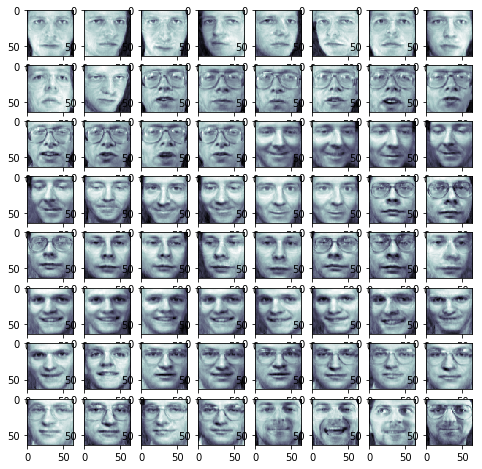

In [30]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_image[i],cmap=plt.cm.bone)
plt.show()

In [33]:
eigenv=pca.components_
eigenv.shape

(123, 4096)

In [34]:
eigenfaces=eigenv.reshape((123,64,64))

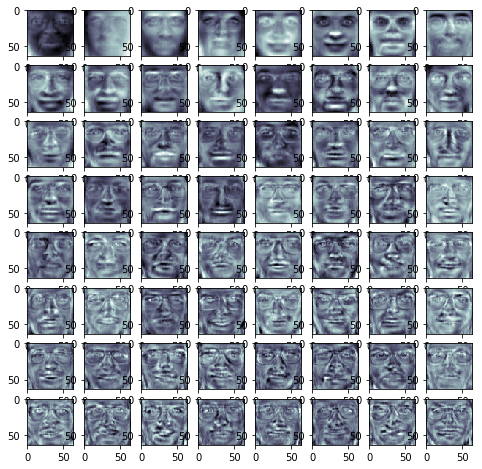

In [35]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()